In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
len(words)

32033

In [4]:
# mapping the characters like last time
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [20]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size 
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [21]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [22]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [23]:
# embedding 27 possible characters into 2 dimensional space 
C = torch.randn((27,2))

In [24]:
C

tensor([[ 0.2618,  1.2021],
        [ 0.3727, -0.6803],
        [-1.0204, -0.5122],
        [-0.0252, -2.0683],
        [ 1.8639,  0.5692],
        [-0.4875, -1.4693],
        [ 0.1396, -1.3825],
        [-0.4270,  0.8689],
        [-1.3343, -0.2546],
        [ 0.8850,  1.8479],
        [-0.1655, -0.0633],
        [-0.8225,  0.7049],
        [ 0.0808, -2.3667],
        [-0.8851, -0.5006],
        [-0.8584, -2.0973],
        [-0.4729,  1.7699],
        [-0.4819,  0.5406],
        [ 0.0266, -0.5935],
        [ 1.4007,  1.2897],
        [-2.8296, -0.1236],
        [ 0.8095,  0.8003],
        [-0.3872, -0.1925],
        [ 0.1111,  1.0709],
        [-0.9190, -1.4757],
        [-0.9506, -0.3659],
        [ 0.4914, -0.4404],
        [-0.1837, -0.9260]])

In [25]:
C[5]

tensor([-0.4875, -1.4693])

In [26]:
# to get multiple rows 
C[[5,6,7]]

tensor([[-0.4875, -1.4693],
        [ 0.1396, -1.3825],
        [-0.4270,  0.8689]])

In [29]:
# X is our input with context length of 3 which is integer type 
C[X] # basically picks out bunch of rows using X as the index

tensor([[[ 0.2618,  1.2021],
         [ 0.2618,  1.2021],
         [ 0.2618,  1.2021]],

        [[ 0.2618,  1.2021],
         [ 0.2618,  1.2021],
         [-0.4875, -1.4693]],

        [[ 0.2618,  1.2021],
         [-0.4875, -1.4693],
         [-0.8851, -0.5006]],

        [[-0.4875, -1.4693],
         [-0.8851, -0.5006],
         [-0.8851, -0.5006]],

        [[-0.8851, -0.5006],
         [-0.8851, -0.5006],
         [ 0.3727, -0.6803]],

        [[ 0.2618,  1.2021],
         [ 0.2618,  1.2021],
         [ 0.2618,  1.2021]],

        [[ 0.2618,  1.2021],
         [ 0.2618,  1.2021],
         [-0.4729,  1.7699]],

        [[ 0.2618,  1.2021],
         [-0.4729,  1.7699],
         [ 0.0808, -2.3667]],

        [[-0.4729,  1.7699],
         [ 0.0808, -2.3667],
         [ 0.8850,  1.8479]],

        [[ 0.0808, -2.3667],
         [ 0.8850,  1.8479],
         [ 0.1111,  1.0709]],

        [[ 0.8850,  1.8479],
         [ 0.1111,  1.0709],
         [ 0.8850,  1.8479]],

        [[ 0.1111,  1

In [30]:
C[X].shape

torch.Size([32, 3, 2])

In [31]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [32]:
# creating a hidden layer with 100 neurons
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [33]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [34]:
h

tensor([[-0.9895, -0.2656,  0.4672,  ..., -0.9374,  0.9650,  0.9992],
        [-0.9987, -0.3504,  0.9989,  ...,  0.3377,  0.9857, -0.9508],
        [ 0.9628,  0.8747,  0.9400,  ..., -0.9982, -0.0940,  0.7188],
        ...,
        [-0.9364,  0.9291,  0.9998,  ..., -0.9709,  1.0000,  0.4170],
        [ 0.9331,  0.8746, -0.9628,  ..., -0.9985,  0.4114,  0.9981],
        [-0.9880,  0.6834,  0.2940,  ...,  0.9344,  0.9925, -0.8059]])

In [35]:
h.shape

torch.Size([32, 100])

In [36]:
# final layer 
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [37]:
logits = h @ W2 + b2

In [38]:
logits.shape

torch.Size([32, 27])

In [39]:
counts = logits.exp()

In [40]:
prob = counts / counts.sum(1, keepdims=True)

In [41]:
prob.shape

torch.Size([32, 27])

In [42]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.9491)

Cleaning up the code

In [51]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words:
    # print(w)
    context = [0] * block_size 
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

In [53]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [54]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [69]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [70]:
sum(p.nelement() for p in parameters)

3481

In [71]:
for p in parameters:
    p.requires_grad = True

In [72]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [73]:
lri = []
lossi = [] 

for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track 
    lri.append(lre[i])
    lossi.append(loss.item())
        
# print(loss.item())

18.53854751586914
18.00963020324707
20.844074249267578
19.81801414489746
16.88454818725586
19.739896774291992
19.354822158813477
17.816986083984375
19.659616470336914
23.367521286010742
20.59062957763672
17.184236526489258
16.340505599975586
19.16507339477539
18.136798858642578
17.82735824584961
17.14055061340332
19.003463745117188
18.88205337524414
19.48909568786621
21.189451217651367
19.721378326416016
18.84700584411621
17.282634735107422
22.608781814575195
19.657230377197266
17.274240493774414
16.085208892822266
18.456771850585938
16.168670654296875
20.105487823486328
16.39841079711914
20.782032012939453
18.326757431030273
18.66985511779785
20.280258178710938
16.477760314941406
17.515472412109375
16.284778594970703
18.831300735473633
15.716496467590332
17.855587005615234
17.53632926940918
20.339807510375977
18.214521408081055
17.207551956176758
16.953800201416016
17.79155158996582
20.206098556518555
18.437332153320312
18.245481491088867
16.26643943786621
17.260971069335938
16.227310

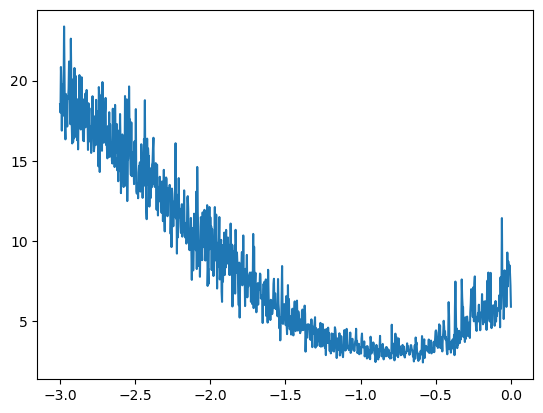

In [74]:
plt.plot(lri, lossi)
plt.show()

The ideal learning rate seems to be around 0.1

In [75]:
# checking the loss on the entire dataset
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(8.2653, grad_fn=<NllLossBackward0>)

Next, we split the dataset into training (80%), validation (10%) and test dataset (10%)

In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
    '''
    Creating a fucntion that builds the dataset
    '''
    X, Y = [], []
    for w in words:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [6]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [27]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [28]:
sum(p.nelement() for p in parameters)

10281

In [29]:
for p in parameters:
    p.requires_grad = True

In [30]:
lri = []
lossi = [] 
stepi = [] 

In [45]:
for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track 
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())
        
print(loss.item())

2.2268831729888916


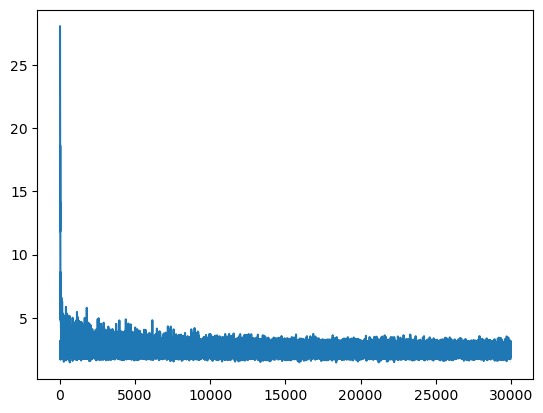

In [46]:
plt.plot(stepi, lossi)
plt.show()

In [47]:
# checking the loss on the entire dataset
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2361, grad_fn=<NllLossBackward0>)

In [48]:
# checking the loss on the entire dataset
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2430, grad_fn=<NllLossBackward0>)

If the above two numbers are very similar, it means that we are underfitting. Even though, we have made the hidden layer much bigger, the loss is not reducing significantly, implying some other bottleneck--the 2 dimensional embedding we created earlier. Let us visualize it. 

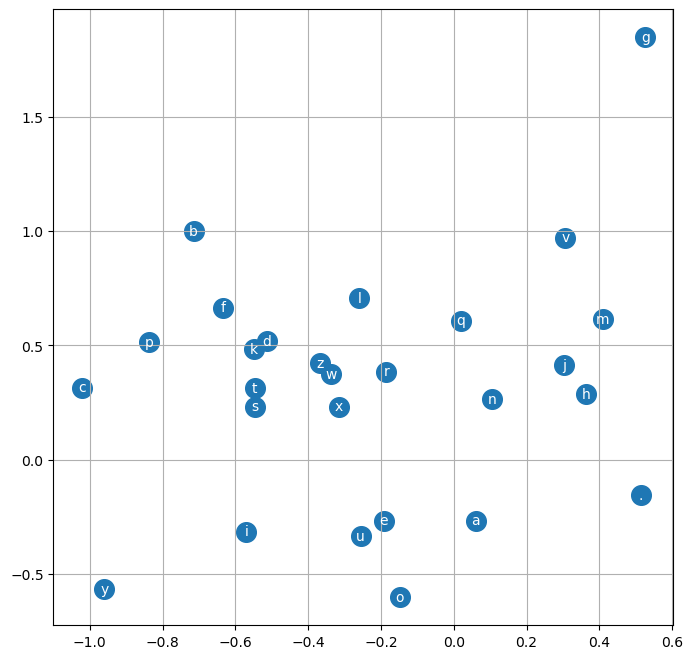

In [49]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')
plt.show()

We see that the model has placed the vowels close to each other in this 2-dimensional vector space. 

In [53]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) #since context size is 3, 3*10
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [54]:
sum(p.nelement() for p in parameters)

11897

In [55]:
for p in parameters:
  p.requires_grad = True

In [56]:
lri = []
lossi = []
stepi = []

In [61]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] 
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2 
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01 
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

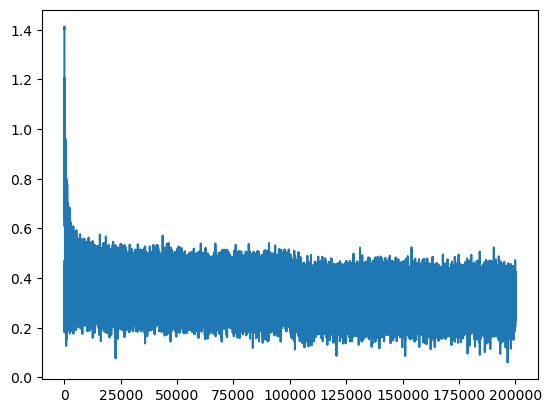

In [62]:
plt.plot(stepi, lossi)
plt.show()

In [63]:
emb = C[Xtr] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0776, grad_fn=<NllLossBackward0>)

In [64]:
emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1325, grad_fn=<NllLossBackward0>)

In [65]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
americkifrimy.
xilita.
halayson.
rah.
bradherric.
kaeli.
ner.
kia.
chaihvik.
leggyn.
bron.
cateegan.
shoine.
livabi.
wazelo.
dearynix.
kaelynn.
deme.
deco.
